## Loan Application Status Prediction

Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

Dataset Link

https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score, auc

from sklearn.model_selection import cross_val_score

## Data Collection

In [2]:
loan_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Observation:
            1. Label (i.e. "Loan_Status") contains classification data so this is a Classification 
               Problem.
            2. Binary Classification Problem

## Exploratory Data Analysis

In [3]:
loan_df.shape

(614, 13)

In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Drop Column not needed

In [6]:
loan_df.shape

(614, 13)

In [7]:
# 'Loan_ID' column not needed for prediction of 'Loan_Status'

loan_df.drop('Loan_ID', axis = 1, inplace = True)

In [8]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
loan_df.shape

(614, 12)

## Handle Null values

In [10]:
loan_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
loan_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observation:
            1. There lot of NULL values
            2. The columns - 'Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 
               'Loan_Amount_Term', 'Credit_History' have NULL values.
            3. The columns - 'Gender', 'Married', 'Dependents', 'Self_Employed' are object type so use 
                mode method to replace the NULL values.
            4. The 'LoanAmount', 'Loan_Amount_Term', 'Credit_History' are float type so use 
                mean method to replace the NULL values.

In [12]:
loan_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
# Handle all features Null values - Object type

for i in loan_df.columns:
    if loan_df.dtypes[i] == 'object':
        loan_df[i] = loan_df[i].fillna(loan_df[i].mode()[0])

In [14]:
loan_df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# Handle all features Null values  - Float type

for i in loan_df.columns:
    if loan_df.dtypes[i] == 'float64':
        loan_df[i] = loan_df[i].fillna(loan_df[i].mean())

In [16]:
loan_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Observation:
            1. Now no NULL values

## check for any blank records

In [17]:
for i in loan_df.columns:
    print(loan_df.loc[loan_df[i] == ' '])

Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index

Observation:
            1. checked all 12 columns but none have any blank values

## check the duplicate values in rows

In [18]:
loan_df.shape

(614, 12)

In [19]:
loan_df.duplicated().sum()

0

In [20]:
loan_df.shape

(614, 12)

Observation:
            1. No duplicate values in any of the rows.

## Number of uniques values in each column

In [21]:
loan_df.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,11
Credit_History,3


In [22]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Observations:
            1. No missing values
            2. Mean value is > median value so it is right skew and postively correlated
            3. There are huge difference betwen 75% and max and hence looks like there are quite 
                more number of outliers

In [23]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [103]:
# check the value counts of each column

for i in loan_df.columns:
    print(loan_df[i].value_counts())
    print('\n')

Male      502
Female    112
Name: Gender, dtype: int64


Yes    401
No     213
Name: Married, dtype: int64


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     532
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0     

## Data Visualization

In [24]:
loan_df.shape

(614, 12)

In [44]:
# seperating numerical and categorical columns

cat_col = []
for i in loan_df.dtypes.index:
    if loan_df.dtypes[i] == 'object':
        cat_col.append(i)
print("Categorical Column", cat_col)
print("\n")


num_col = []
for i in loan_df.dtypes.index:
    if loan_df.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical Column", num_col)

Categorical Column ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical Column ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


Male      502
Female    112
Name: Gender, dtype: int64


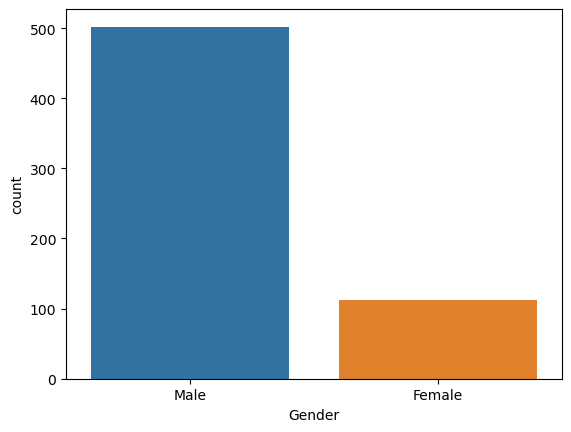

In [45]:
# Univariate Analysis

sns.countplot(x = 'Gender', data = loan_df)
print(loan_df.Gender.value_counts())

Observation:
            1. There are more number of Male customers - 502

Yes    401
No     213
Name: Married, dtype: int64


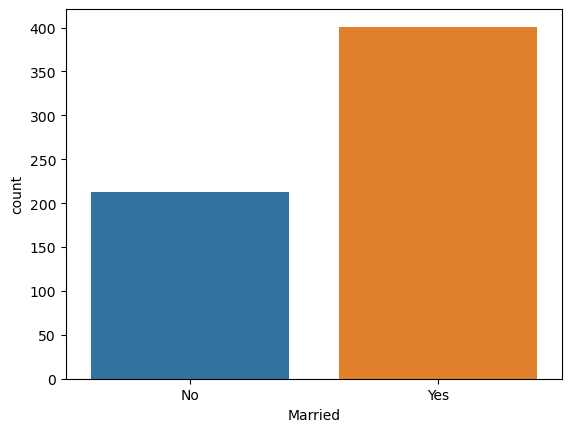

In [46]:
# Univariate Analysis

sns.countplot(x = 'Married', data = loan_df)
print(loan_df.Married.value_counts())

Observation:
            1. more number of customers are married - 401

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


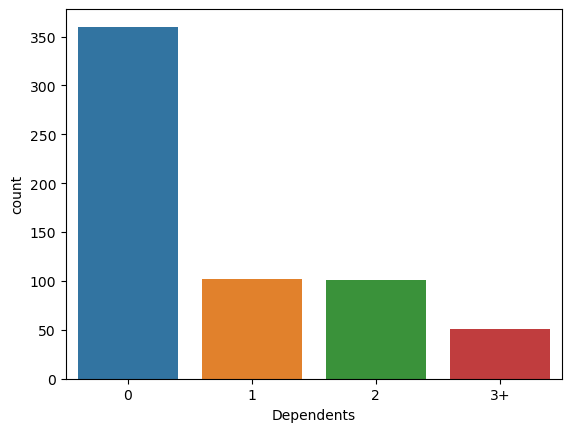

In [47]:
# Univariate Analysis

sns.countplot(x = 'Dependents', data = loan_df)
print(loan_df.Dependents.value_counts())

Observation:
            1. More number of customers have no dependents - 360

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


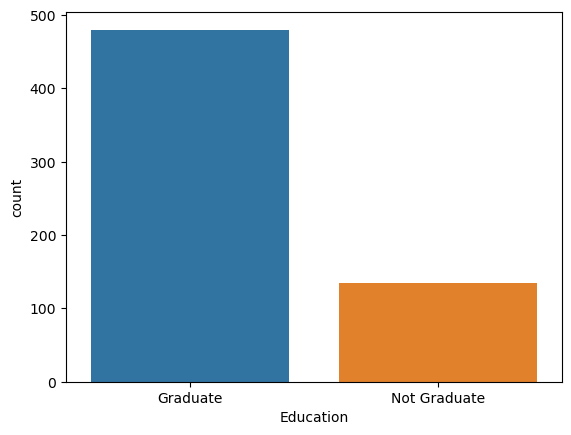

In [48]:
# Univariate Analysis

sns.countplot(x = 'Education', data = loan_df)
print(loan_df.Education.value_counts())

Observation:
            1. More number of customers are graduates - 480

No     532
Yes     82
Name: Self_Employed, dtype: int64


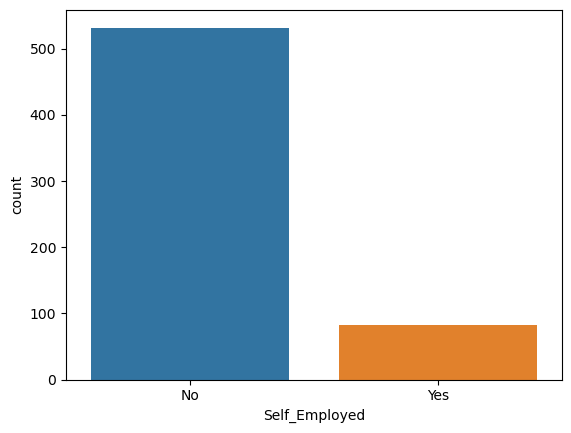

In [49]:
# Univariate Analysis

sns.countplot(x = 'Self_Employed', data = loan_df)
print(loan_df.Self_Employed.value_counts())

Observation:
            1. More number of customers are not self employed - 532

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


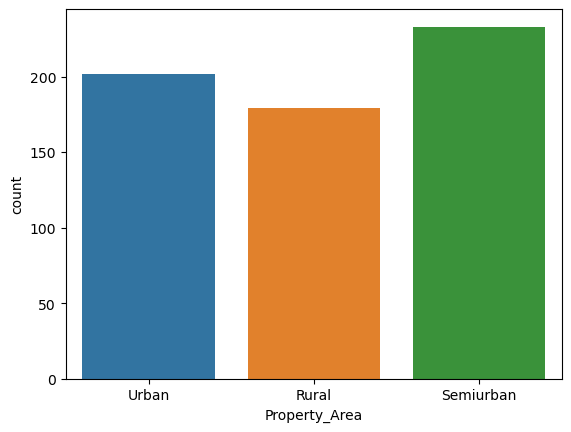

In [50]:
# Univariate Analysis

sns.countplot(x = 'Property_Area', data = loan_df)
print(loan_df.Property_Area.value_counts())

Observation:
            1. More number of Semiurban property area - 233

Y    422
N    192
Name: Loan_Status, dtype: int64


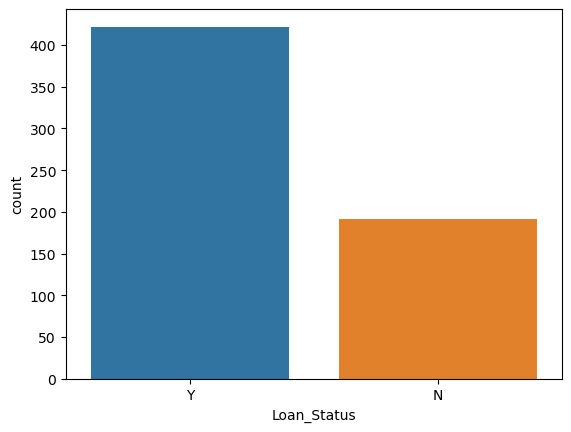

In [51]:
# Univariate Analysis

sns.countplot(x = 'Loan_Status', data = loan_df)
print(loan_df.Loan_Status.value_counts())

Observation:
            1. More number of customers are eligible to avail the requested Loan - 422
            2. Data is imbalanced, need to do data balancing. 

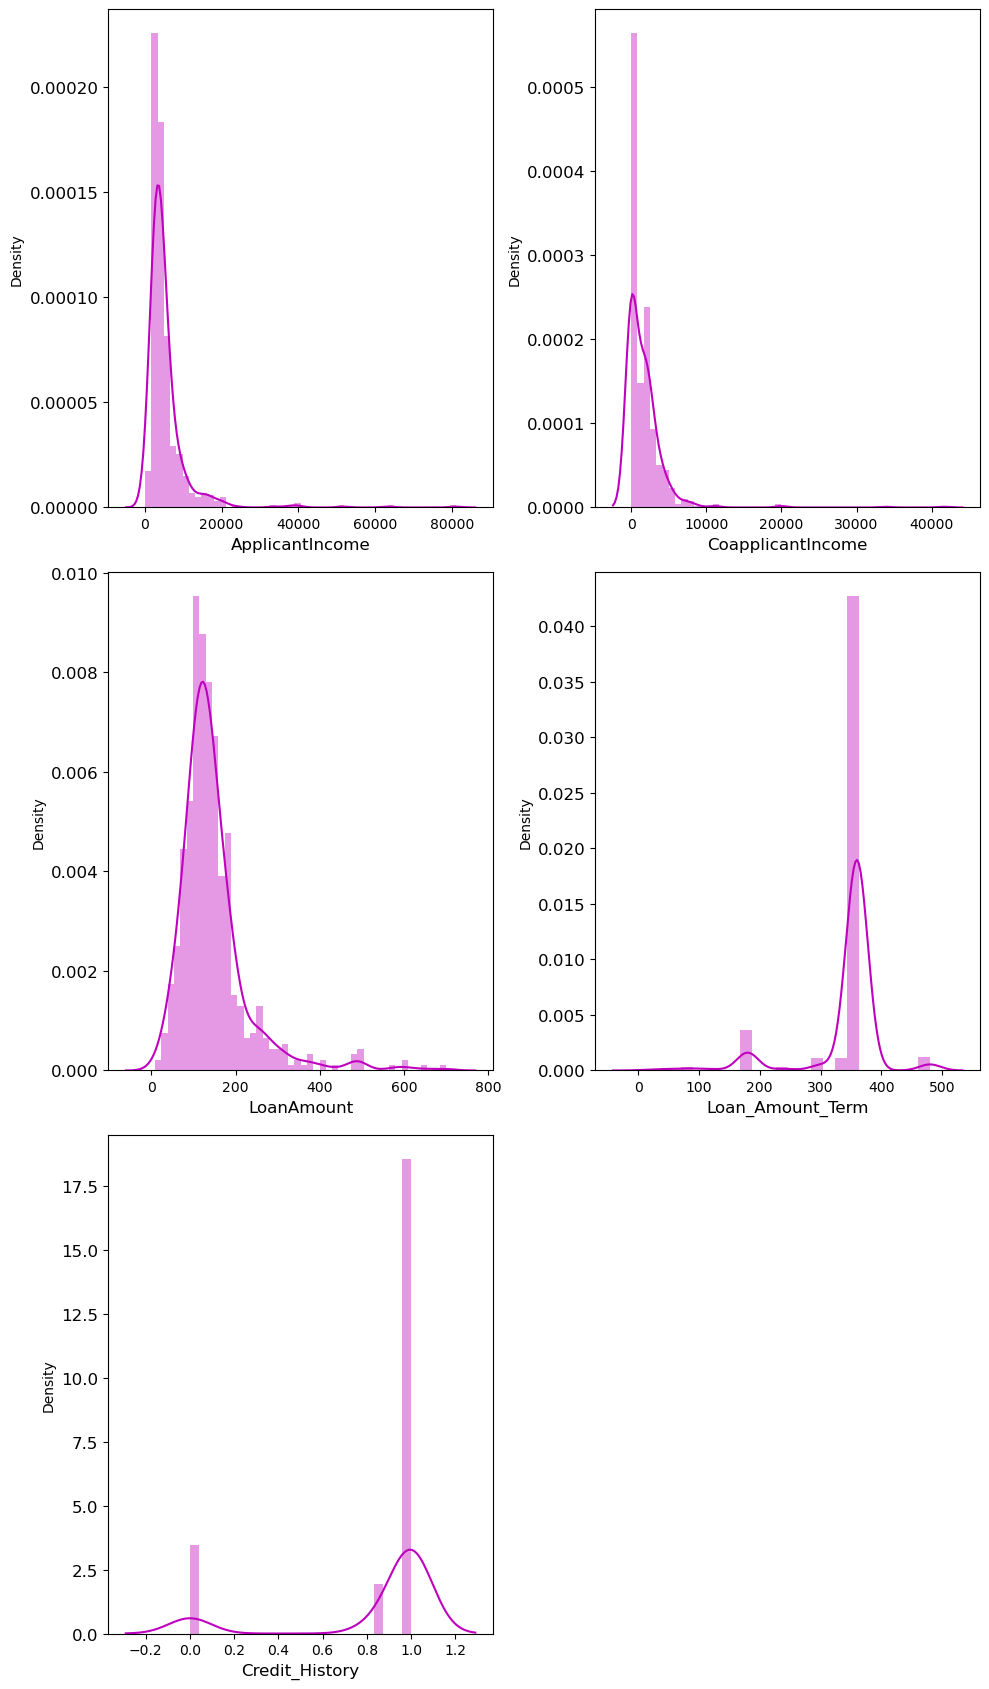

In [52]:
# lets see how data is distributed for each numerical column

plt.figure(figsize=(10, 17))
p = 1
for i in num_col:
    if p <= 5:
        ax = plt.subplot(3, 2, p)
        sns.distplot(loan_df[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observation:
            1. The continuous data like 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                'Loan_Amount_Term' are not well normally distributed. 
            2. There are outliers
            3. We need to deal with skewness in the data 

In [53]:
loan_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [54]:
loan_df.shape

(614, 12)

In [55]:
loan_df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

## Feature Encoding

In [56]:
# Convert Object data type to int type

loan_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [57]:
loan_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [58]:
cat_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [59]:
from sklearn.preprocessing import LabelEncoder

label_enc =  LabelEncoder()

In [60]:
for i in cat_col:
    loan_df[i] = label_enc.fit_transform(loan_df[i])

In [61]:
loan_df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

Observation:
            1. Converted all Object data type to int type

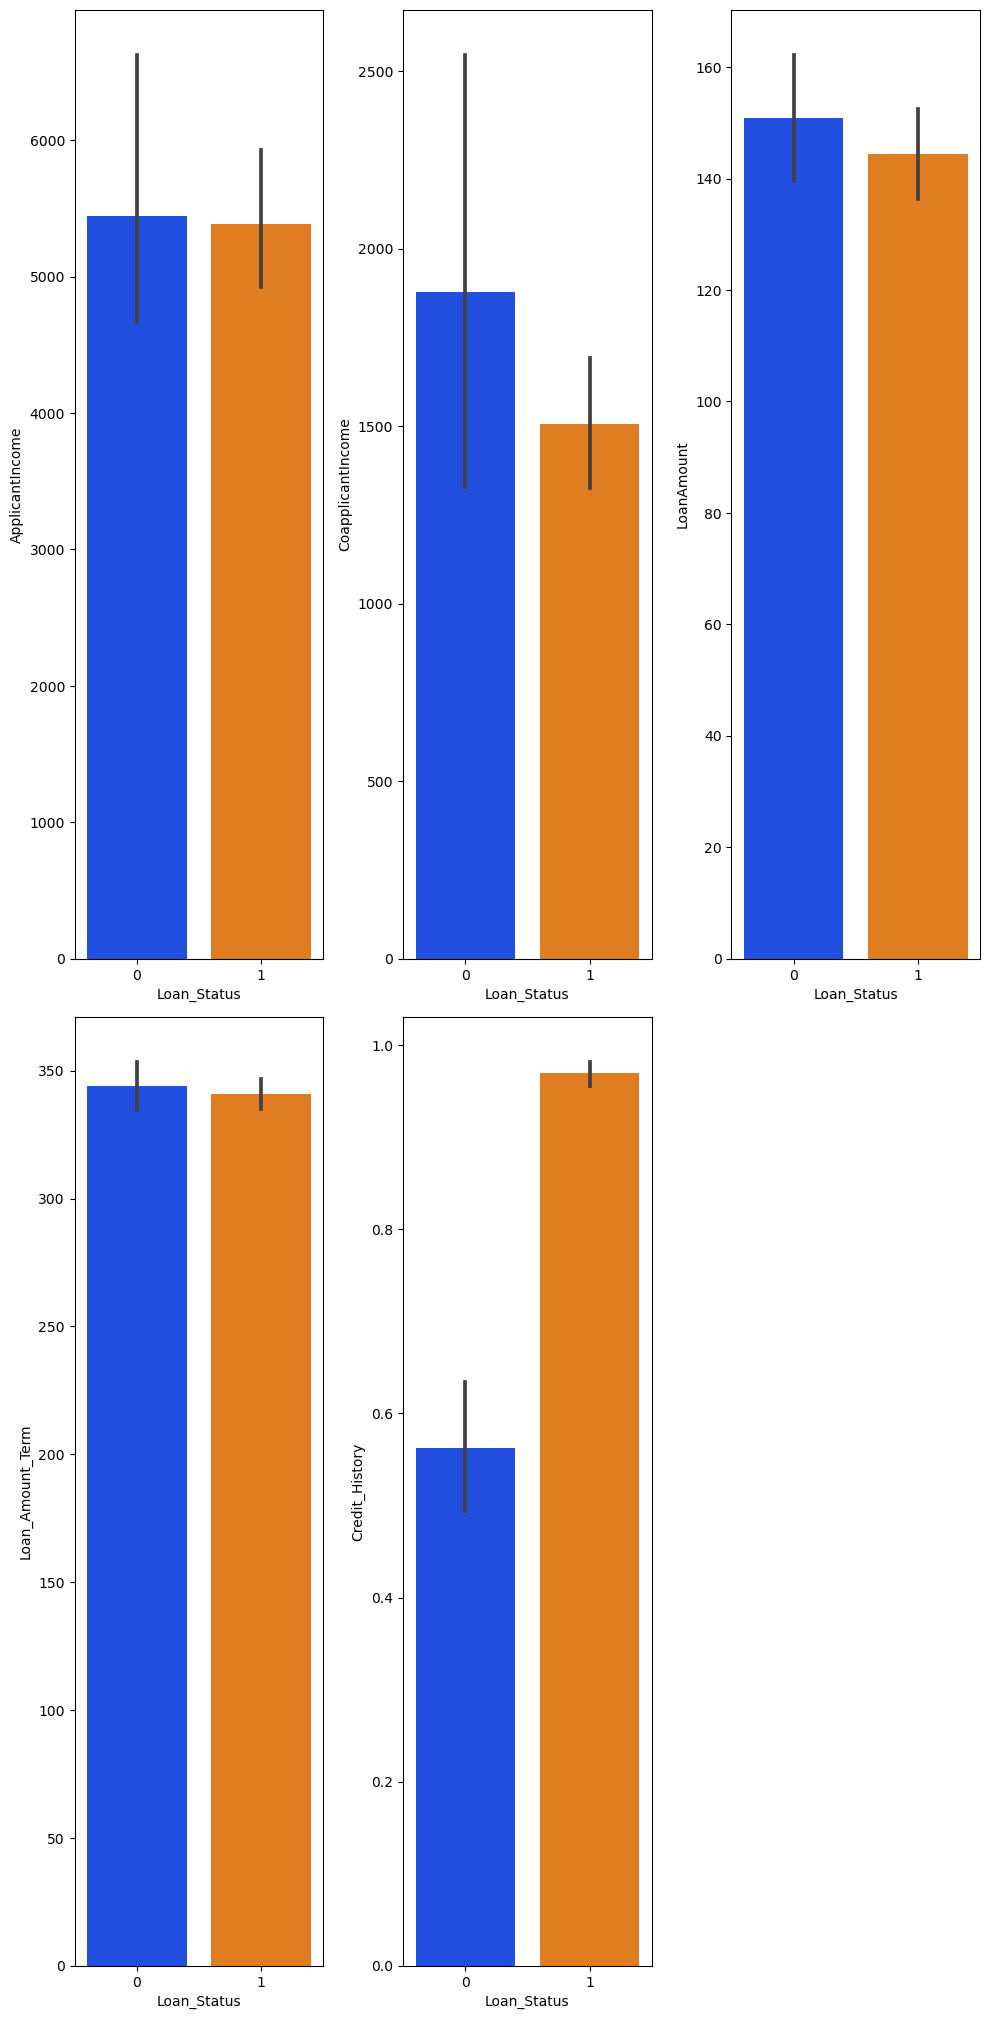

In [62]:
plt.figure(figsize = (10, 40))
p = 1
for i in num_col:
    if p <= 11:
        ax = plt.subplot(4, 3, p)
        sns.barplot(x = 'Loan_Status', y = loan_df[i], data = loan_df, palette = 'bright')
       
    p = p + 1
plt.tight_layout()

## Check for Multicollinearity

## Data Correlation find - whether we need all 31 columns

In [63]:
# get coefficient of one variable with all the other variables

cor = loan_df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


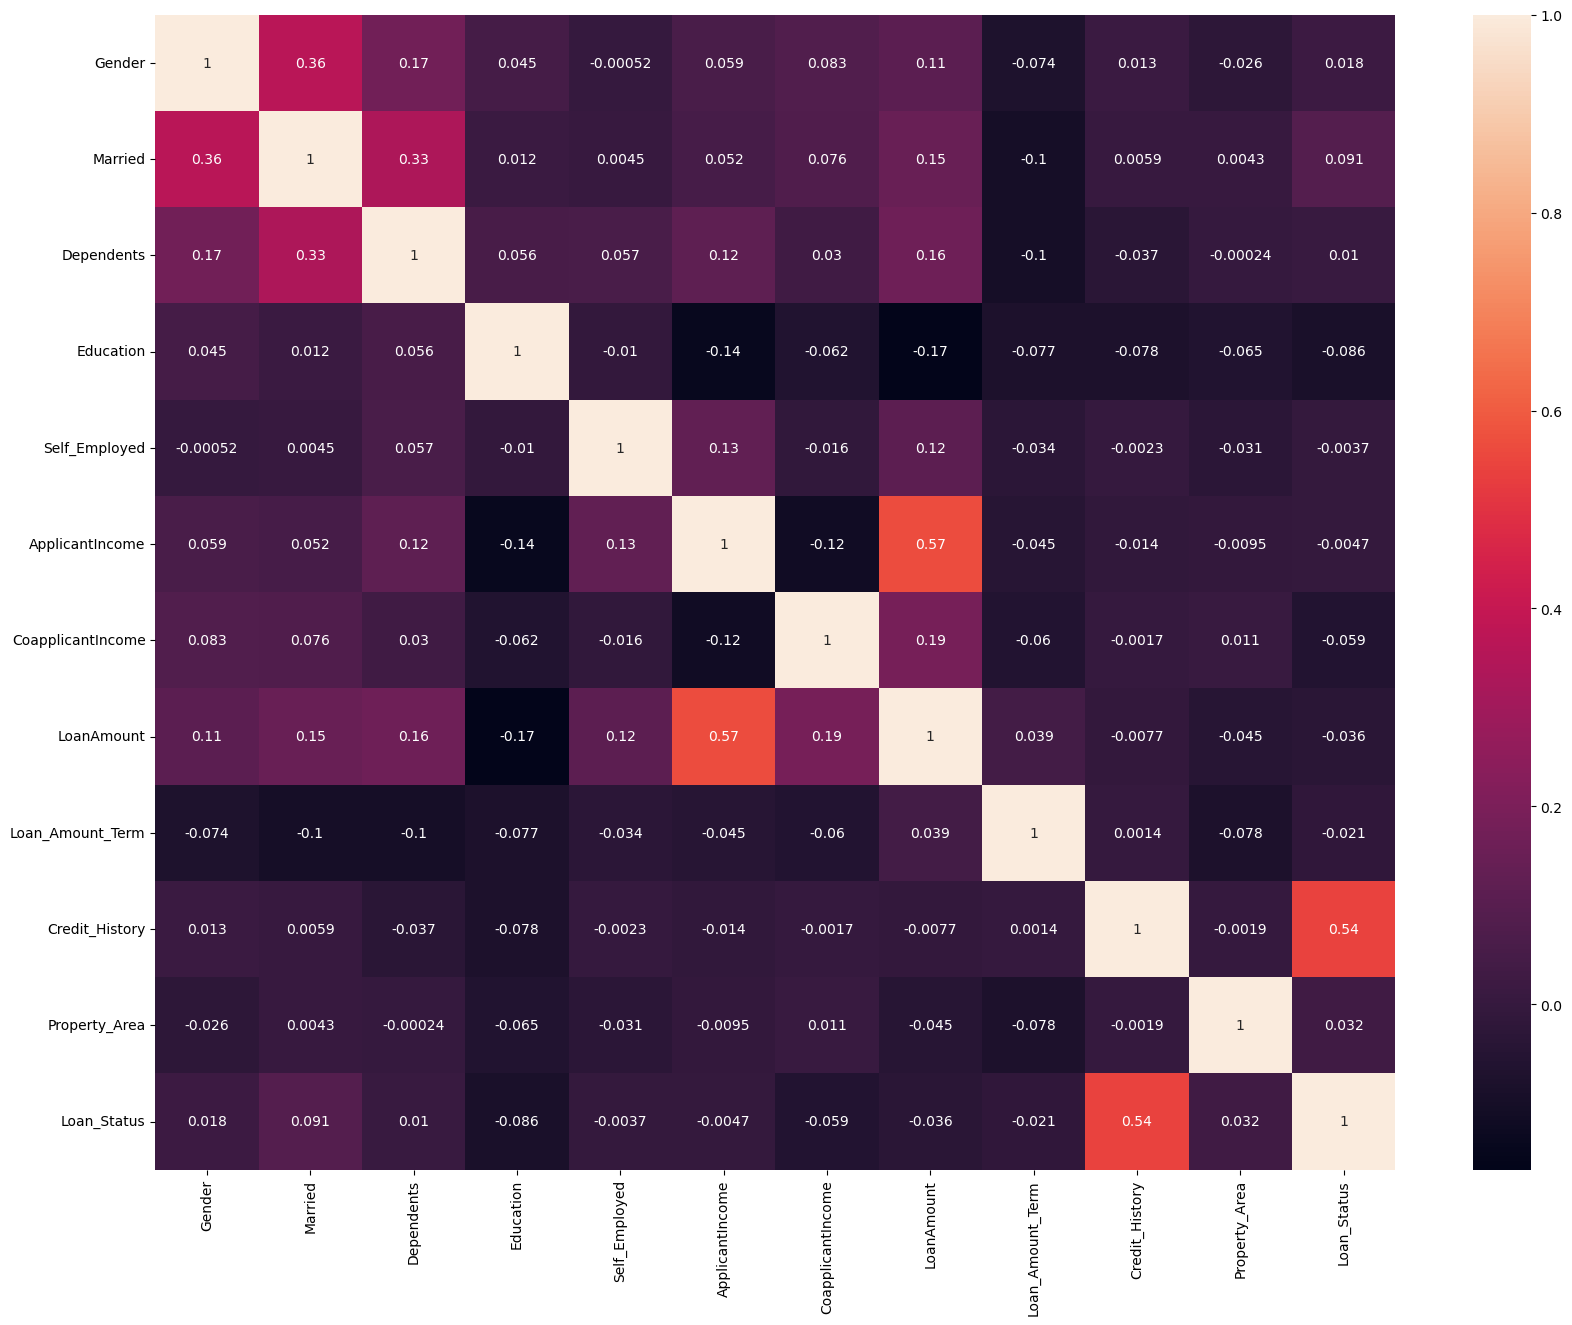

In [64]:
# visualize correlation using heatmap

plt.figure(figsize = (20, 15))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. features are not positively correlated.

In [65]:
loan_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Checking Outliers

In [66]:
# we dont check outliers for labels and categorocal column so remove it

loan_df_features = loan_df.drop(['Loan_Status', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], axis = 1)

In [67]:
loan_df_features.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0


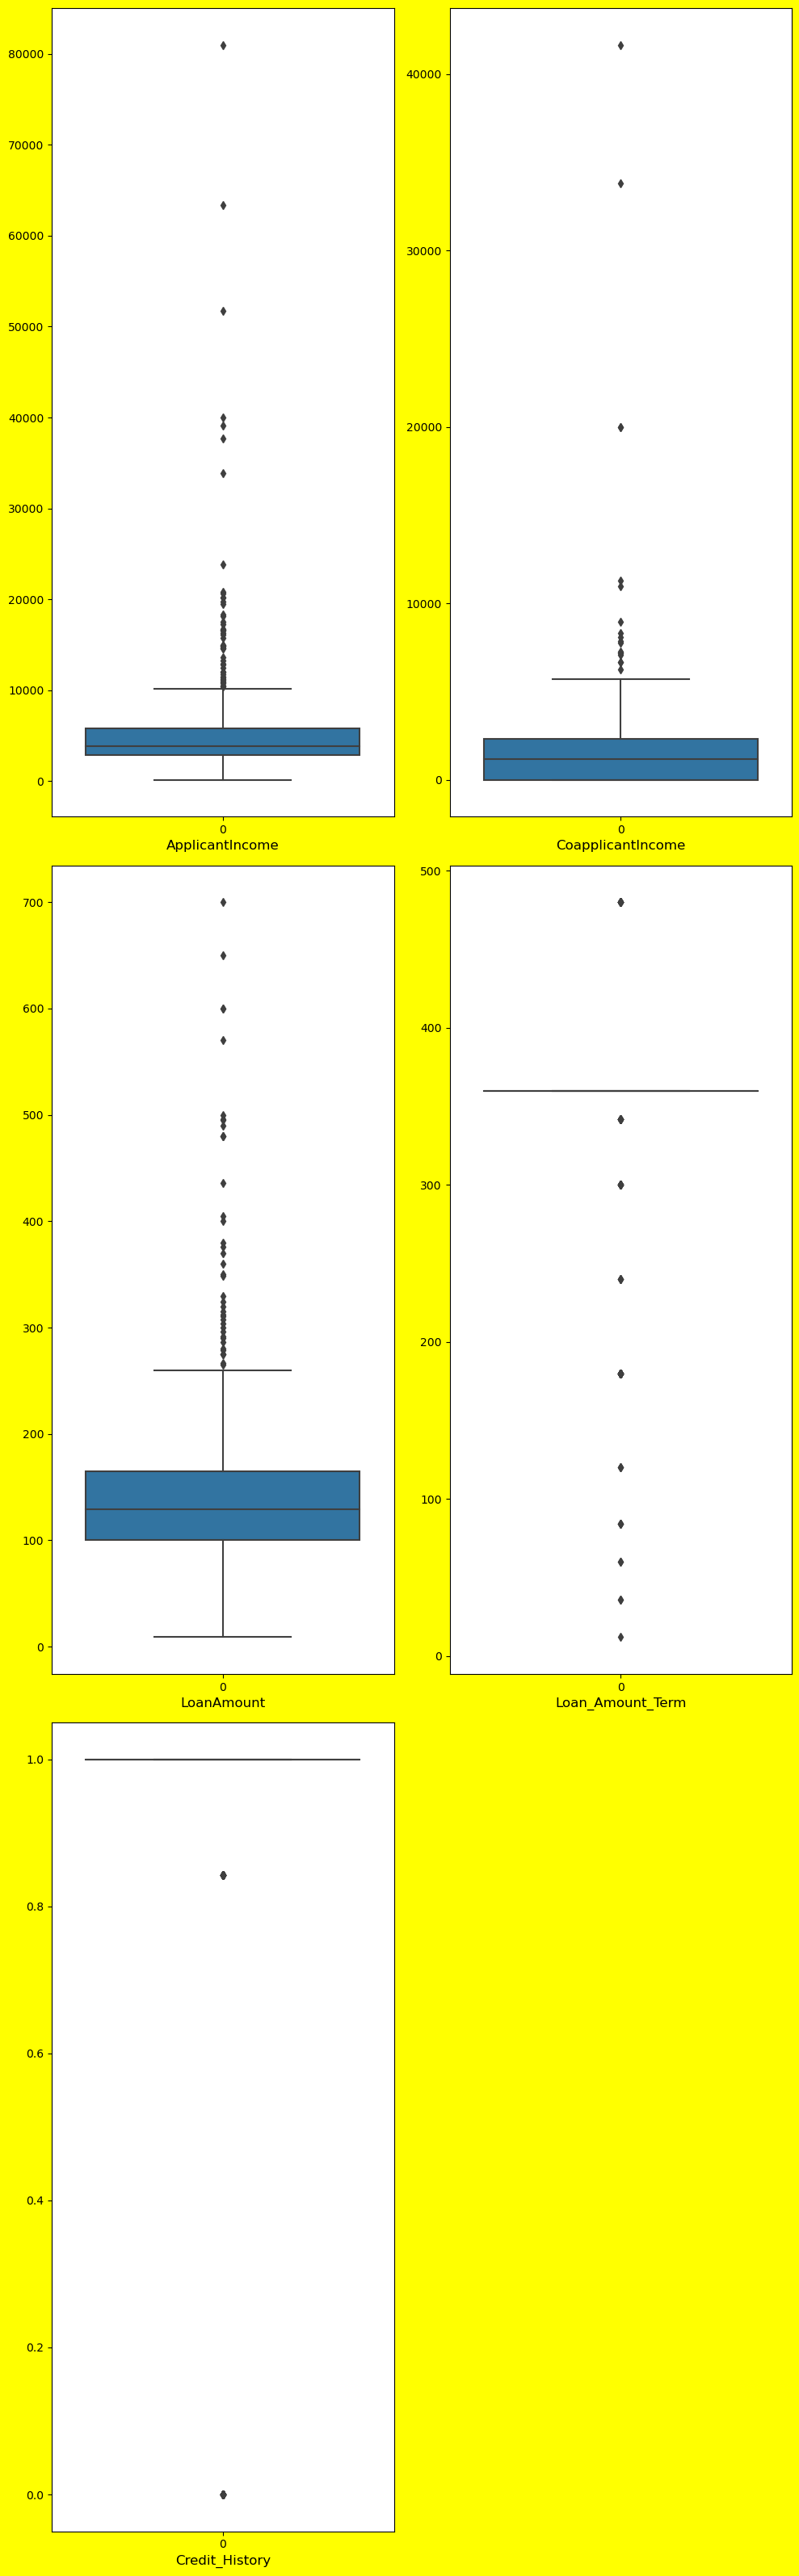

In [68]:
# Visualize the outliers using boxplot

plt.figure(figsize=(10,32), facecolor = 'yellow')
p = 1
for i in loan_df_features:
    if p <= 5:
        ax = plt.subplot(3, 2, p)
        sns.boxplot(data = loan_df_features[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observations:
            1. More Outliers found in almost all numerical features. 
               Most of this outliers are right skewed (i.e. outliers are above max value)
            2. Remove the outliers

In [69]:
loan_df_features.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

## Find IQR to identify outliers and remove it

In [70]:
# there are situation we should remove outliers and sometime to keep outliers

q1 = loan_df.quantile(0.25)
q3 = loan_df.quantile(0.75)
iqr = q3 - q1

In [71]:
# validating one outlier

ApplicantIncome_high = (q3['ApplicantIncome'] + (1.5 * iqr['ApplicantIncome']))
ApplicantIncome_high

# anything > 10171.25 outliers

10171.25

In [72]:
# check the index which have the higher values

np_index = np.where(loan_df['ApplicantIncome'] > ApplicantIncome_high)
np_index

# remove these indexes as they are outliers

(array([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
        146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
        324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
        487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604], dtype=int64),)

In [73]:
loan_df.shape

(614, 12)

In [74]:
loan_df = loan_df.drop(loan_df.index[np_index])

In [75]:
loan_df.shape  # 50 rows removed - outliers

(564, 12)

In [76]:
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [77]:
loan_df.reset_index(inplace = True, drop = True)

In [78]:
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
559,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
560,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
561,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
562,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


Observations:
            1. As we have less samples, we are not going to remove any outliers further

## Checking for Skewness

In [79]:
loan_df.skew() # not in the range -0.5 to +0.5

Gender              -1.647295
Married             -0.633928
Dependents           1.024181
Education            1.259650
Self_Employed        2.362709
ApplicantIncome      1.065673
CoapplicantIncome    7.601316
LoanAmount           1.673685
Loan_Amount_Term    -2.410125
Credit_History      -1.957955
Property_Area       -0.040662
Loan_Status         -0.822389
dtype: float64

In [80]:
# removing for skewness

loan_df['ApplicantIncome'] = np.cbrt(loan_df['ApplicantIncome'])

loan_df['CoapplicantIncome'] = np.cbrt(loan_df['CoapplicantIncome'])

loan_df['LoanAmount'] = np.cbrt(loan_df['LoanAmount'])

loan_df['Loan_Amount_Term'] = np.cbrt(loan_df['Loan_Amount_Term'])

loan_df['Credit_History'] = np.cbrt(loan_df['Credit_History'])

In [81]:
loan_df.skew() # not in the range -0.5 to +0.5

Gender              -1.647295
Married             -0.633928
Dependents           1.024181
Education            1.259650
Self_Employed        2.362709
ApplicantIncome      0.086388
CoapplicantIncome    0.097740
LoanAmount           0.074649
Loan_Amount_Term    -3.603517
Credit_History      -2.009556
Property_Area       -0.040662
Loan_Status         -0.822389
dtype: float64

Observation: 
            1. There are still skewness in the data

## Seperating Features and Target

In [82]:
loan_df.shape

(564, 12)

In [83]:
x = loan_df.drop(columns = ['Loan_Status'])
y = loan_df['Loan_Status']

In [84]:
x.shape

(564, 11)

In [85]:
y.shape

(564,)

## One more proof to check for Multicollinearity problem - use Variance Inflation Factor (VIF)

In [86]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x)
x_scaled

array([[ 0.472681  , -1.36489713, -0.73010082, ...,  0.28080647,
         0.42753206,  1.24246983],
       [ 0.472681  ,  0.73265595,  0.26452928, ...,  0.28080647,
         0.42753206, -1.30109817],
       [ 0.472681  ,  0.73265595, -0.73010082, ...,  0.28080647,
         0.42753206,  1.24246983],
       ...,
       [ 0.472681  ,  0.73265595,  0.26452928, ...,  0.28080647,
         0.42753206,  1.24246983],
       [ 0.472681  ,  0.73265595,  1.25915939, ...,  0.28080647,
         0.42753206,  1.24246983],
       [-2.11559168, -1.36489713, -0.73010082, ...,  0.28080647,
        -2.42217574, -0.02931417]])

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,1.226279,Gender
1,1.369596,Married
2,1.185715,Dependents
3,1.068297,Education
4,1.047024,Self_Employed
5,1.854816,ApplicantIncome
6,1.732371,CoapplicantIncome
7,1.785488,LoanAmount
8,1.049060,Loan_Amount_Term
9,1.012020,Credit_History


In [ ]:
Observation: 
            1. The threshold VIF value is 5 and any feature > 5 VIF value has high correlation with 
               other features. Here we observe all features are < threshold value. 
               so there might not be multicollinearity problem.

## Modelling

In [88]:
loan_df.shape

(564, 12)

In [89]:
x.shape

(564, 11)

In [90]:
y.shape

(564,)

In [91]:
y.value_counts()

1    389
0    175
Name: Loan_Status, dtype: int64

In [108]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x)
x_scaled

array([[ 0.472681  , -1.36489713, -0.73010082, ...,  0.28080647,
         0.42753206,  1.24246983],
       [ 0.472681  ,  0.73265595,  0.26452928, ...,  0.28080647,
         0.42753206, -1.30109817],
       [ 0.472681  ,  0.73265595, -0.73010082, ...,  0.28080647,
         0.42753206,  1.24246983],
       ...,
       [ 0.472681  ,  0.73265595,  0.26452928, ...,  0.28080647,
         0.42753206,  1.24246983],
       [ 0.472681  ,  0.73265595,  1.25915939, ...,  0.28080647,
         0.42753206,  1.24246983],
       [-2.11559168, -1.36489713, -0.73010082, ...,  0.28080647,
        -2.42217574, -0.02931417]])

## HoldOut Validation Approach 

In [121]:
# creating train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 41)

In [122]:
x_train.shape

(423, 11)

In [123]:
y_train.shape

(423,)

In [124]:
x_test.shape

(141, 11)

In [125]:
y_test.shape

(141,)

## Decision Tree

## we have selected KFold Cross Validation technique.

In [126]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle = True)

In [127]:
model_DT = DecisionTreeClassifier()

In [128]:
scores1 = cross_val_score(model_DT, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores1

array([0.70588235, 0.71764706, 0.67058824, 0.64285714, 0.69047619])

In [129]:
print(np.mean(scores1)) 

0.6854901960784314


In [130]:
model_DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [131]:
DT_test_acc = model_DT.score(x_test, y_test)
print(DT_test_acc)

0.7021276595744681


In [132]:
# to check the confusion matrix

y_pred1 = model_DT.predict(x_test)
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[19, 14],
       [28, 80]], dtype=int64)

Observation:
            1. Decision Tree model with kfold cross validation - 70.21%

## Random Forest Tree Classifier

In [133]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

In [134]:
kfold = KFold(n_splits = 5, shuffle = True)

In [135]:
random_clf = RandomForestClassifier()

In [136]:
scores2 = cross_val_score(random_clf, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores2

array([0.78823529, 0.81176471, 0.72941176, 0.72619048, 0.77380952])

In [138]:
print(np.mean(scores2))

0.7658823529411765


In [139]:
random_clf.fit(x_train, y_train)

RandomForestClassifier()

In [140]:
random_clf_test_acc = random_clf.score(x_test, y_test)
print(random_clf_test_acc)

0.8439716312056738


In [141]:
# to check the confusion matrix

y_pred2 = random_clf.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[ 16,  17],
       [  5, 103]], dtype=int64)

Observation:
            1. Random Forest Tree model with kfold cross validation - 84.39%

## Extra Tree Classifier

In [143]:
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier()

In [144]:
kfold = KFold(n_splits = 5, shuffle = True)

In [147]:
scores3 = cross_val_score(ETC, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores3

array([0.71764706, 0.75294118, 0.78823529, 0.76190476, 0.78571429])

In [148]:
print(np.mean(scores3))

0.7612885154061624


In [149]:
ETC.fit(x_train, y_train) 

ExtraTreesClassifier()

In [150]:
ETC_test_acc = ETC.score(x_test, y_test)
print(ETC_test_acc)

0.8085106382978723


In [151]:
# to check the confusion matrix

y_pred3 = ETC.predict(x_test)
cm3 = confusion_matrix(y_test, y_pred3)
cm3

array([[17, 16],
       [11, 97]], dtype=int64)

In [ ]:
Observation:
            1. Extra Tree model with kfold cross validation - 80.85%

## Logistic Regression Classifier

In [158]:
s = StandardScaler()
x_scaled_1 = s.fit_transform(x)
x_scaled_1

array([[ 0.472681  , -1.36489713, -0.73010082, ...,  0.28080647,
         0.42753206,  1.24246983],
       [ 0.472681  ,  0.73265595,  0.26452928, ...,  0.28080647,
         0.42753206, -1.30109817],
       [ 0.472681  ,  0.73265595, -0.73010082, ...,  0.28080647,
         0.42753206,  1.24246983],
       ...,
       [ 0.472681  ,  0.73265595,  0.26452928, ...,  0.28080647,
         0.42753206,  1.24246983],
       [ 0.472681  ,  0.73265595,  1.25915939, ...,  0.28080647,
         0.42753206,  1.24246983],
       [-2.11559168, -1.36489713, -0.73010082, ...,  0.28080647,
        -2.42217574, -0.02931417]])

In [159]:
# creating train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled_1, y, test_size = 0.25, random_state = 41)

In [160]:
LR = LogisticRegression()

In [161]:
kfold = KFold(n_splits = 5, shuffle = True)

In [163]:
scores4 = cross_val_score(LR, x_train1, y_train1, cv = kfold, scoring = 'accuracy')
scores4

array([0.75294118, 0.77647059, 0.8       , 0.88095238, 0.77380952])

In [164]:
print(np.mean(scores4))

0.7968347338935573


In [165]:
LR.fit(x_train1, y_train1) 

LogisticRegression()

In [166]:
LR_test_acc = LR.score(x_test, y_test)
print(LR_test_acc)

0.7659574468085106


In [167]:
# to check the confusion matrix

y_pred4 = LR.predict(x_test1)
cm4 = confusion_matrix(y_test1, y_pred4)
cm4

array([[ 16,  17],
       [  1, 107]], dtype=int64)

Observation:
            1. Logistic Regression model with kfold cross validation - 76.59%

In [ ]:
Observation: 
            1. Decision Tree model with kfold cross validation - 70.21%
            2. Random Forest Tree model with kfold cross validation - 84.39%
            3. Extra Tree model with kfold cross validation - 80.85%
            4. Logistic Regression model with kfold cross validation - 76.59%
            5. We can chose Random Forest Tree model for hyper tuning

## HyperParameter Tuning for Random Forest Tree model as its accuracy is better 84.39%

In [168]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'], 'random_state': [10, 50, 100, 1000], 'max_depth': [0, 10, 20, 25],
             'n_jobs': [-3, -2, -1, 1], 'n_estimators': [25, 50, 100, 200, 300]}


In [169]:
kfold = KFold(n_splits = 5, shuffle = True)

In [170]:
grid_search = GridSearchCV(estimator = random_clf, param_grid = parameters, scoring = 'accuracy', cv = kfold)

In [171]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20, 25],
                         'n_estimators': [25, 50, 100, 200, 300],
                         'n_jobs': [-3, -2, -1, 1],
                         'random_state': [10, 50, 100, 1000]},
             scoring='accuracy')

In [172]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -3,
 'random_state': 100}

## Retrain the model with the hyperparameters

In [173]:
random_clf_final_model = RandomForestClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 100, n_jobs = -3,
 random_state = 100)

In [174]:
random_clf_final_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_jobs=-3,
                       random_state=100)

In [175]:
grid_search.best_score_

0.789607843137255

In [176]:
random_clf_final_model_test_acc = random_clf_final_model.score(x_test, y_test)
print(random_clf_final_model_test_acc)

0.8368794326241135


In [ ]:
Observation:
            1. Random Forest Tree model with hypertuning - accuracy -  83.687%
            2. Random Forest Tree model without hypertuning - accuracy - 84.39%
            3. We will choose Random Forest Tree model without hypertuning for prediction of the data

## Save the Model

In [177]:
# use Extra Tree Classifier and the save the model as it has good testing accuracy

import pickle
pickle.dump(random_clf, open('Loan_Application_Status_Model.pkl', 'wb'))

## prediction using the saved model

In [178]:
loaded_model = pickle.load(open('Loan_Application_Status_Model.pkl', 'rb'))
prediction_saved_model = loaded_model.predict(x_test)
prediction_saved_model

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1])

In [179]:
print(y_test)

461    1
197    1
525    0
382    1
192    1
      ..
521    0
300    1
207    1
291    1
443    1
Name: Loan_Status, Length: 141, dtype: int32


In [180]:
# comparing the predicted and actual values

a = np.array(y_test)
df1 = pd.DataFrame()
df1['Predicted'] = prediction_saved_model
df1['Original'] = a
df1

,Predicted,Original
0,1,1
1,1,1
2,1,0
3,1,1
4,1,1
...,...,...
136,1,0
137,1,1
138,1,1
139,1,1


Observation:
            1. Almost all actual and predicted values match
            2. This Loan_Application_Status_Model.pkl can be used to predict whether the loan of the
               applicant will be approved or not

Observation:
            1. Decision Tree model with kfold cross validation - 70.21%
            2. Random Forest Tree model with kfold cross validation - 84.39%
            3. Extra Tree model with kfold cross validation - 80.85%
            4. Logistic Regression model with kfold cross validation - 76.59%
            5. Random Forest Tree model with hypertuning - accuracy -  83.687%
            6. Comparing all the Classifiers - Random Forest Tree model without hypertuning has the
               good accuracy and our model is also free from overfitting/underfitting problem